In [1]:
from pathlib import Path
from synthesizer.hparams import hparams
from synthesizer.train import train
from utils.argutils import print_args
import argparse
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_input(prompt, default):
    user_input = input(f"{prompt} (default: {default}): ")
    return user_input if user_input.strip() else default

In [3]:
arguments = [
    ("run_id", {"type": str, "prompt": "Name for this model. By default, training outputs will be stored to saved_models/<run_id>/.", "default": "default"}),
    ("syn_dir", {"type": Path, "prompt": "Path to the synthesizer directory that contains the ground truth mel spectrograms, the wavs and the embeds.", "default": ""}),
    ("models_dir", {"type": Path, "prompt": "Path to the output directory that will contain the saved model weights and the logs.", "default": "saved_models"}),
    ("save_every", {"type": int, "prompt": "Number of steps between updates of the model on the disk. Set to 0 to never save the model.", "default": 1000}),
    ("backup_every", {"type": int, "prompt": "Number of steps between backups of the model. Set to 0 to never make backups of the model.", "default": 25000}),
    ("force_restart", {"action": "store_true", "prompt": "Do not load any saved model and restart from scratch.", "default": "True"}),
    ("hparams", {"default": "", "prompt": "Hyperparameter overrides as a comma-separated list of name=value pairs.", "default": ""}),
]

# Get input for each argument
args = {}
for arg_name, arg_params in arguments:
    args[arg_name] = get_input(arg_params["prompt"], arg_params["default"])

# Parse hyperparameters
args["hparams"] = hparams.parse(args["hparams"])

# Run the training
epochs, simil_train, simil_test = train(**args)

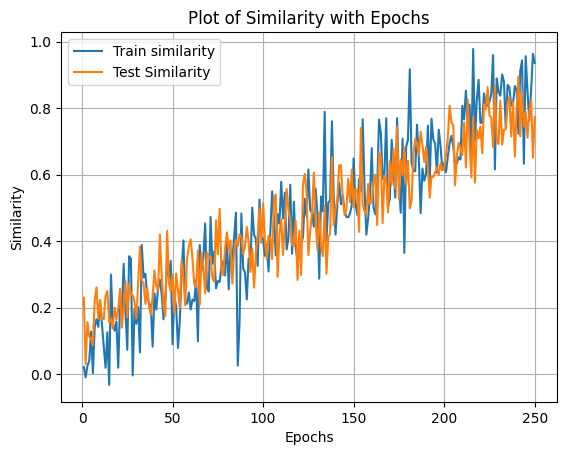

In [4]:
plt.plot(epochs, simil_train, marker='', linestyle='-', label='Train similarity')
plt.plot(epochs, simil_test, marker='', linestyle='-', label='Test Similarity')  # Adding another line

# Add labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Similarity')
plt.title('Plot of Similarity with Epochs')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [5]:
print('Similarity Score:', simil_test[-1])

Similarity Score: 0.8017828374678292
